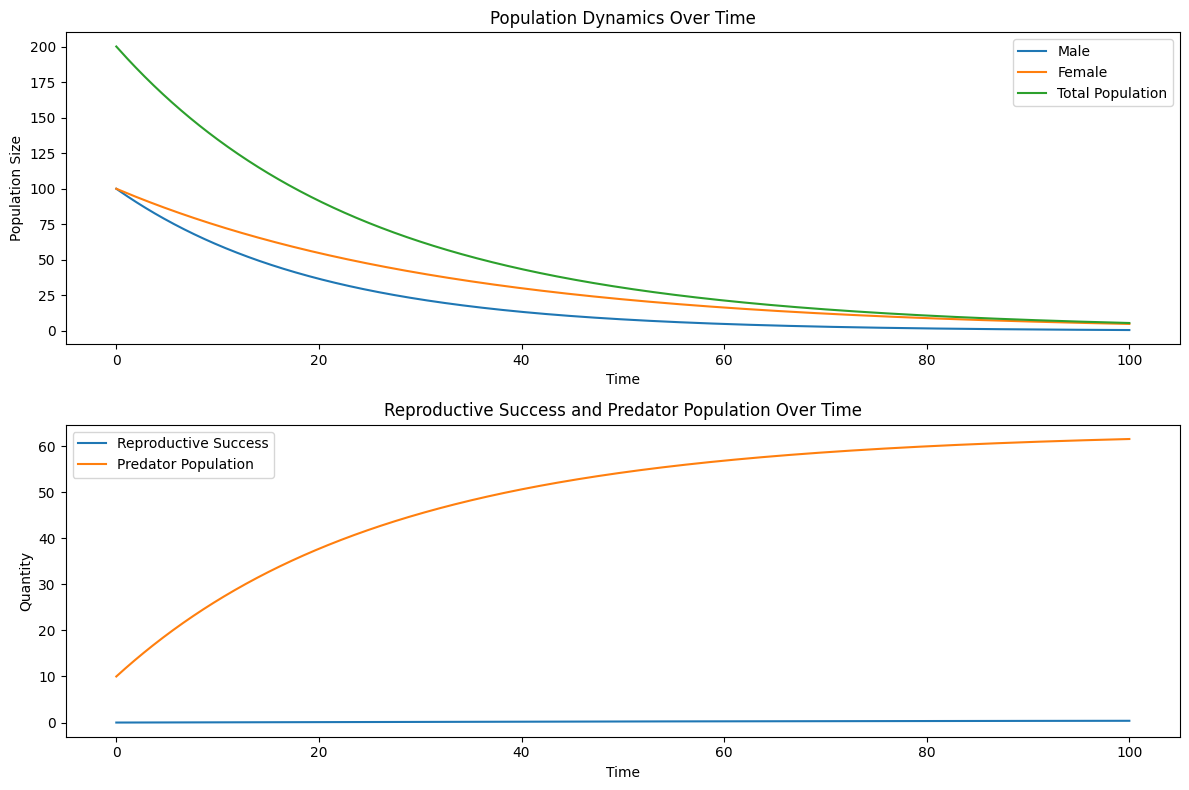

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 模型参数
alpha = 0.1  # 雄性相对于资源的生长率
beta = 0.05  # 雄性相对于数量的死亡率
gamma = 0.08  # 雌性相对于资源的生长率
delta = 0.03  # 雌性相对于数量的死亡率
rho = 0.02   # 繁殖成功率常数
eta = 0.01   # 捕食者的攻击率常数

# 初始条件
M_0 = 100  # 初始雄性数量
F_0 = 100  # 初始雌性数量
P_0 = M_0 + F_0  # 初始总体数量
R_0 = 0.5  # 初始资源可用性

# 模拟时间参数
dt = 0.1  # 时间步长
t_max = 100  # 模拟时间
num_steps = int(t_max / dt) + 1

# 初始化数组
time = np.linspace(0, t_max, num_steps)
M = np.zeros(num_steps)
F = np.zeros(num_steps)
P = np.zeros(num_steps)
R = np.zeros(num_steps)
B = np.zeros(num_steps)
H = np.zeros(num_steps)

# 设置初始条件
M[0] = M_0
F[0] = F_0
P[0] = P_0
R[0] = R_0
B[0] = 0
H[0] = 10  # 初始捕食者数量

# Euler 方法求解微分方程
for i in range(1, num_steps):
    dM_dt = alpha * R[i-1] - beta * M[i-1]
    dF_dt = gamma * R[i-1] - delta * F[i-1]
    dP_dt = dM_dt + dF_dt

    # 注意：修正了未定义的变量p_f
    p_f = F[i-1] / P[i-1] if P[i-1] > 0 else 0

    dB_dt = rho * p_f * (1 - p_f)
    dH_dt = eta * P[i-1]

    M[i] = M[i-1] + dt * dM_dt
    F[i] = F[i-1] + dt * dF_dt
    P[i] = P[i-1] + dt * dP_dt
    B[i] = B[i-1] + dt * dB_dt
    H[i] = H[i-1] + dt * dH_dt

# 绘制模型结果
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, M, label='Male')
plt.plot(time, F, label='Female')
plt.plot(time, P, label='Total Population')
plt.legend()
plt.title('Population Dynamics Over Time')
plt.xlabel('Time')
plt.ylabel('Population Size')

plt.subplot(2, 1, 2)
plt.plot(time, B, label='Reproductive Success')
plt.plot(time, H, label='Predator Population')
plt.legend()
plt.title('Reproductive Success and Predator Population Over Time')
plt.xlabel('Time')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga

# 模型和初始条件同上

# 目标函数：可以是繁殖成功数量与捕食者数量的某种组合
def objective_function(params):
    p_f = params[0]  # 从遗传算法中获得的参数，表示雌性比例
    B = np.zeros(num_steps)
    H = np.zeros(num_steps)

    for i in range(1, num_steps):
        dM_dt = alpha * R[i-1] - beta * M[i-1]
        dF_dt = gamma * R[i-1] - delta * F[i-1]
        dP_dt = dM_dt + dF_dt

        dB_dt = rho * p_f * (1 - p_f)
        dH_dt = eta * P[i-1]

        M[i] = M[i-1] + dt * dM_dt
        F[i] = F[i-1] + dt * dF_dt
        P[i] = P[i-1] + dt * dP_dt
        B[i] = B[i-1] + dt * dB_dt
        H[i] = H[i-1] + dt * dH_dt

    # 优化目标可以是繁殖成功数量与捕食者数量的某种组合
    return -B[-1]  # 这里取负号表示最大化繁殖成功数量

# 定义参数范围
varbound = np.array([[0, 1]])  # 雌性比例的范围在 [0, 1] 之间

# 遗传算法配置
algorithm_param = {'max_num_iteration': 100, 'population_size': 10, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# 创建遗传算法模型
model = ga(function=objective_function, dimension=1, variable_type='real', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

# 运行遗传算法
model.run()

# 输出最优雌性比例参数
best_params = model.output_dict['variable']
best_p_f = best_params[0]

# 使用最优参数重新运行模型
B_optimized = np.zeros(num_steps)
H_optimized = np.zeros(num_steps)

for i in range(1, num_steps):
    dM_dt = alpha * R[i-1] - beta * M[i-1]
    dF_dt = gamma * R[i-1] - delta * F[i-1]
    dP_dt = dM_dt + dF_dt

    dB_dt = rho * best_p_f * (1 - best_p_f)
    dH_dt = eta * P[i-1]

    M[i] = M[i-1] + dt * dM_dt
    F[i] = F[i-1] + dt * dF_dt
    P[i] = P[i-1] + dt * dP_dt
    B_optimized[i] = B_optimized[i-1] + dt * dB_dt
    H_optimized[i] = H_optimized[i-1] + dt * dH_dt

# 绘制模型结果
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, M, label='Male')
plt.plot(time, F, label='Female')
plt.plot(time, P, label='Total Population')
plt.legend()
plt.title('Population Dynamics Over Time')
plt.xlabel('Time')
plt.ylabel('Population Size')

plt.subplot(2, 1, 2)
plt.plot(time, B_optimized, label='Reproductive Success (Optimized)')
plt.plot(time, H_optimized, label='Predator Population (Optimized)')
plt.legend()
plt.title('Reproductive Success and Predator Population Over Time (Optimized)')
plt.xlabel('Time')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()


KeyError: 'parents_portion'